In [69]:
import multiprocessing

import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from sklearn import cross_validation, metrics 
from sklearn.grid_search import GridSearchCV 

import matplotlib.pylab as plt
%matplotlib inline

In [70]:
kagTrainDat = pd.read_csv('~/Documents/git/DataMining/train.csv')
kagTestDat = pd.read_csv('~/Documents/git/DataMining/test.csv')

In [71]:
def modelfit(alg, X_train, y_train, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=100):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train[predictors].values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics="auc", early_stopping_rounds=early_stopping_rounds, verbose_eval=500)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train[predictors], y_train, eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train[predictors])
    dtrain_predprob = alg.predict_proba(X_train[predictors])[:, 1]
        
    #Print model report:
    #print (cvresult)
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_train.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)

    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [46]:
kagTrainDat.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [6]:
kagTestDat.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [72]:
y_train = kagTrainDat['ACTION']
X_train = kagTrainDat.ix[:, kagTrainDat.columns != 'ACTION']

X_test = kagTestDat.ix[:, kagTestDat.columns != 'id']

Will train until cv error hasn't decreased in 50 rounds.
[0]	cv-test-auc:0.6240458+0.009494636199454945	cv-train-auc:0.6530128+0.007535541955294244


Stopping. Best iteration:
[210] cv-mean:0.8432976	cv-std:0.011443132850753742



Model Report
Accuracy : 0.9684
AUC Score (Train): 0.980907


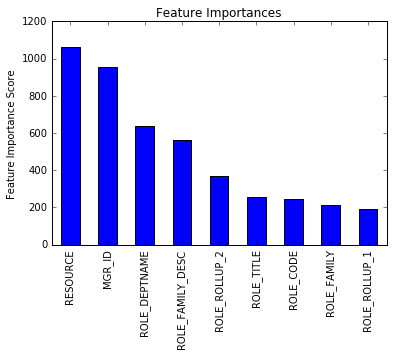

In [8]:
predictors = np.delete(kagTrainDat.columns.get_values(), 0)

gbm = xgb.XGBClassifier(nthread=multiprocessing.cpu_count(), n_estimators=1000,  max_depth=5,
                        objective='binary:logistic', learning_rate=0.3)

modelfit(gbm, X_train, y_train, predictors)

In [73]:
param_test1 = {
    'max_depth': list(range(3, 10, 2)),
    'min_child_weight': list(range(1, 6, 2))
}

gsearch1 = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.3, n_estimators=210, max_depth=5,
                                                    min_child_weight=1, gamma=0, objective='binary:logistic',
                                                    nthread=multiprocessing.cpu_count(), scale_pos_weight=1),
                        param_grid=param_test1, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch1.fit(X_train, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

KeyboardInterrupt: 

In [10]:
param_test2 = {
    'max_depth': [6, 7, 8],
    'min_child_weight': [0, 1, 2]
}

gsearch2 = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.3, n_estimators=210, max_depth=7,
                                                    min_child_weight=1, gamma=0, objective='binary:logistic',
                                                    nthread=multiprocessing.cpu_count(), scale_pos_weight=1),
                        param_grid=param_test2, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch2.fit(X_train, y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.84685, std: 0.01549, params: {'max_depth': 6, 'min_child_weight': 0},
  mean: 0.84788, std: 0.01280, params: {'max_depth': 6, 'min_child_weight': 1},
  mean: 0.84742, std: 0.01091, params: {'min_child_weight': 2, 'max_depth': 6},
  mean: 0.84404, std: 0.01309, params: {'min_child_weight': 0, 'max_depth': 7},
  mean: 0.84991, std: 0.01598, params: {'min_child_weight': 1, 'max_depth': 7},
  mean: 0.84722, std: 0.01258, params: {'max_depth': 7, 'min_child_weight': 2},
  mean: 0.84481, std: 0.01630, params: {'min_child_weight': 0, 'max_depth': 8},
  mean: 0.84781, std: 0.01119, params: {'max_depth': 8, 'min_child_weight': 1},
  mean: 0.84617, std: 0.01477, params: {'min_child_weight': 2, 'max_depth': 8}],
 {'max_depth': 7, 'min_child_weight': 1},
 0.84991044507699343)

In [11]:
param_test3 = {
    'gamma': [i/10.0 for i in range(0, 5)]
}

gsearch3 = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.3, n_estimators=210, max_depth=7,
                                                    min_child_weight=1, gamma=0, objective='binary:logistic',
                                                    nthread=multiprocessing.cpu_count(), scale_pos_weight=1),
                        param_grid=param_test3, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch3.fit(X_train, y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.84991, std: 0.01598, params: {'gamma': 0.0},
  mean: 0.84746, std: 0.01388, params: {'gamma': 0.1},
  mean: 0.85035, std: 0.01321, params: {'gamma': 0.2},
  mean: 0.84594, std: 0.00977, params: {'gamma': 0.3},
  mean: 0.84401, std: 0.01293, params: {'gamma': 0.4}],
 {'gamma': 0.2},
 0.85035420491913938)

Will train until cv error hasn't decreased in 50 rounds.
[0]	cv-test-auc:0.6416422+0.012864649818786345	cv-train-auc:0.6835330000000001+0.010690746185369847


Stopping. Best iteration:
[175] cv-mean:0.8436993999999999	cv-std:0.010164609556692265



Model Report
Accuracy : 0.9829
AUC Score (Train): 0.996103


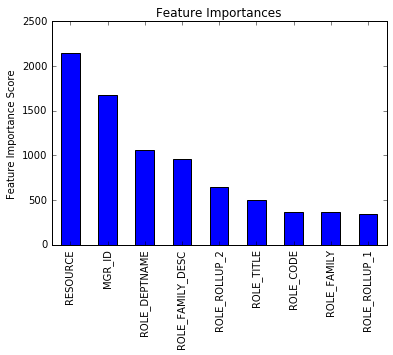

In [12]:
gbm2 = xgb.XGBClassifier(nthread=multiprocessing.cpu_count(), n_estimators=1000,  max_depth=7,
                         objective='binary:logistic', learning_rate=0.3, min_child_weight=1,
                         gamma=0.2)

modelfit(gbm2, X_train, y_train, predictors)

In [32]:
param_test4 = {
    'subsample': [i/10.0 for i in range(3, 11)],
    'colsample_bytree': [i/10.0 for i in range(3, 11)]
}

gsearch4 = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.3, n_estimators=175, max_depth=7,
                                                    min_child_weight=1, gamma=0.2, objective='binary:logistic',
                                                    nthread=multiprocessing.cpu_count(), scale_pos_weight=1),
                        param_grid=param_test4, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch4.fit(X_train, y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.83639, std: 0.01026, params: {'colsample_bytree': 0.3, 'subsample': 0.3},
  mean: 0.84454, std: 0.00981, params: {'colsample_bytree': 0.3, 'subsample': 0.4},
  mean: 0.84557, std: 0.00944, params: {'colsample_bytree': 0.3, 'subsample': 0.5},
  mean: 0.85193, std: 0.00902, params: {'colsample_bytree': 0.3, 'subsample': 0.6},
  mean: 0.85217, std: 0.00913, params: {'colsample_bytree': 0.3, 'subsample': 0.7},
  mean: 0.85525, std: 0.01151, params: {'colsample_bytree': 0.3, 'subsample': 0.8},
  mean: 0.85490, std: 0.00904, params: {'colsample_bytree': 0.3, 'subsample': 0.9},
  mean: 0.85185, std: 0.00860, params: {'colsample_bytree': 0.3, 'subsample': 1.0},
  mean: 0.83500, std: 0.01118, params: {'colsample_bytree': 0.4, 'subsample': 0.3},
  mean: 0.84633, std: 0.01022, params: {'colsample_bytree': 0.4, 'subsample': 0.4},
  mean: 0.84855, std: 0.00878, params: {'colsample_bytree': 0.4, 'subsample': 0.5},
  mean: 0.84740, std: 0.00924, params: {'colsample_bytree': 0.4, 'subsample'

In [33]:
param_test5 = {
    'subsample': [i/100.0 for i in range(80, 100, 5)],
    'colsample_bytree': [i/100.0 for i in range(40, 70, 5)]
}

gsearch5 = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.3, n_estimators=175, max_depth=7,
                                                    min_child_weight=1, gamma=0.2, objective='binary:logistic',
                                                    nthread=multiprocessing.cpu_count(), scale_pos_weight=1),
                        param_grid=param_test5, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch5.fit(X_train, y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.85653, std: 0.01085, params: {'colsample_bytree': 0.4, 'subsample': 0.8},
  mean: 0.85592, std: 0.01198, params: {'colsample_bytree': 0.4, 'subsample': 0.85},
  mean: 0.85780, std: 0.00865, params: {'colsample_bytree': 0.4, 'subsample': 0.9},
  mean: 0.85590, std: 0.01185, params: {'colsample_bytree': 0.4, 'subsample': 0.95},
  mean: 0.85506, std: 0.01245, params: {'colsample_bytree': 0.45, 'subsample': 0.8},
  mean: 0.85670, std: 0.00861, params: {'colsample_bytree': 0.45, 'subsample': 0.85},
  mean: 0.85866, std: 0.01134, params: {'colsample_bytree': 0.45, 'subsample': 0.9},
  mean: 0.85400, std: 0.01169, params: {'colsample_bytree': 0.45, 'subsample': 0.95},
  mean: 0.85506, std: 0.01245, params: {'colsample_bytree': 0.5, 'subsample': 0.8},
  mean: 0.85670, std: 0.00861, params: {'colsample_bytree': 0.5, 'subsample': 0.85},
  mean: 0.85866, std: 0.01134, params: {'colsample_bytree': 0.5, 'subsample': 0.9},
  mean: 0.85400, std: 0.01169, params: {'colsample_bytree': 0.5, 's

In [34]:
param_test6 = {
    'reg_alpha': [0, 1e-5, 1e-2, 0.1, 1, 100]
}

gsearch6 = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.3, n_estimators=175, max_depth=7,
                                                    min_child_weight=1, gamma=0.2, objective='binary:logistic',
                                                    nthread=multiprocessing.cpu_count(), scale_pos_weight=1,
                                                    colsample_bytree=0.45, subsample=0.9),
                        param_grid=param_test6, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch6.fit(X_train, y_train)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.85866, std: 0.01134, params: {'reg_alpha': 0},
  mean: 0.85813, std: 0.01063, params: {'reg_alpha': 1e-05},
  mean: 0.85642, std: 0.01161, params: {'reg_alpha': 0.01},
  mean: 0.85576, std: 0.00982, params: {'reg_alpha': 0.1},
  mean: 0.85558, std: 0.01356, params: {'reg_alpha': 1},
  mean: 0.64312, std: 0.01979, params: {'reg_alpha': 100}],
 {'reg_alpha': 0},
 0.85866229740259925)

In [38]:
param_test7 = {
    'reg_alpha': [0.00, 0.00001, 0.00005, 0.00006, 0.00007]
}

gsearch7 = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.3, n_estimators=175, max_depth=7,
                                                    min_child_weight=1, gamma=0.2, objective='binary:logistic',
                                                    nthread=multiprocessing.cpu_count(), scale_pos_weight=1,
                                                    colsample_bytree=0.45, subsample=0.9),
                        param_grid=param_test7, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch7.fit(X_train, y_train)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.85866, std: 0.01134, params: {'reg_alpha': 0.0},
  mean: 0.85813, std: 0.01063, params: {'reg_alpha': 1e-05},
  mean: 0.85882, std: 0.01014, params: {'reg_alpha': 5e-05},
  mean: 0.85882, std: 0.01014, params: {'reg_alpha': 6e-05},
  mean: 0.85843, std: 0.01040, params: {'reg_alpha': 7e-05}],
 {'reg_alpha': 6e-05},
 0.85882049141100991)

Will train until cv error hasn't decreased in 50 rounds.
[0]	cv-test-auc:0.6057009999999999+0.015211405917928824	cv-train-auc:0.6188352+0.012986082833556865


Stopping. Best iteration:
[128] cv-mean:0.8492654	cv-std:0.008980814653471038



Model Report
Accuracy : 0.9715
AUC Score (Train): 0.984765


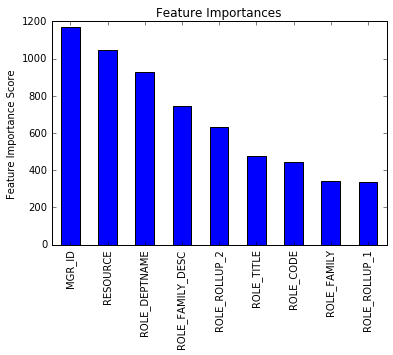

In [40]:
gbm3 = xgb.XGBClassifier(nthread=multiprocessing.cpu_count(), n_estimators=1000,  max_depth=7,
                         objective='binary:logistic', learning_rate=0.3, min_child_weight=1,
                         gamma=0.2, colsample_bytree=0.45, subsample=0.9, reg_alpha=6e-05)

modelfit(gbm3, X_train, y_train, predictors)

In [66]:
gbm4 = xgb.XGBClassifier(nthread=multiprocessing.cpu_count(), n_estimators=408,  max_depth=6,
                         objective='binary:logistic', learning_rate=0.3, min_child_weight=1,
                         gamma=0.2, colsample_bytree=0.25, subsample=0.8, reg_alpha=0.1)

gbm4.fit(X_train, y_train)

y_test = gbm4.predict(X_test)
y_test_proba = gbm4.predict_proba(X_test)

In [68]:
submission = pd.Series(data=y_test, name='Action', index=kagTestDat['id'])

submission.to_csv("~/Documents/git/DataMining/submission_xgboost.csv",index=True,sep=',', header=True,)